# Installations

In [15]:
# %pip install matplotlib numpy pandas scikit-learn

# Load Libraries

In [16]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

import os
import pickle

import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

# Load training data

<h2> Overview of dataset sampling </h2>
<img src="data_collection.png" width="50%"/>

In [17]:
df_extended = pd.read_pickle("dataset.pkl")  
index = df_extended.columns
index[2:4], index[9:-9]

(Index(['x', 'y'], dtype='object'),
 Index([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
        280, 290, 300, 310, 320, 330, 340, 350],
       dtype='object'))

In [18]:
X = df_extended[index[9:-9]].to_numpy()
Y = df_extended[index[2:4]].to_numpy()

X_train, Y_train = X.copy(), Y.copy()

Y.shape, X.shape

((207360, 2), (207360, 36))

# Load testing data

In [19]:
# Initialize Testing Data
fp = open('testRegressSensorData.json', 'r')
locations_test = json.load(fp)
X = []
y = []
Y = []
for location in locations_test:
    # binId = list(cs.transform([location['loc-id']])[0])
    X.append(location['sensorData'])#+binId)
    Y.append(location['pose'][:2])


X_eval = np.array(X)
Y_eval = np.array(Y)
Y_eval.shape, X_eval.shape

((7, 2), (7, 36))

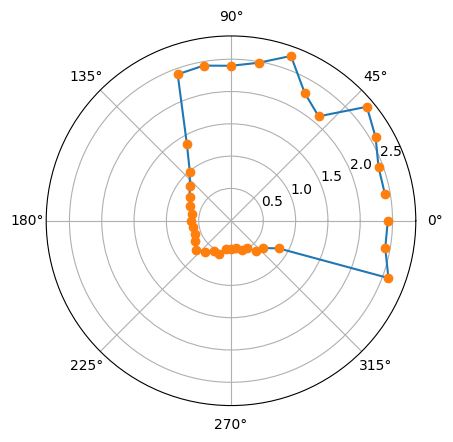

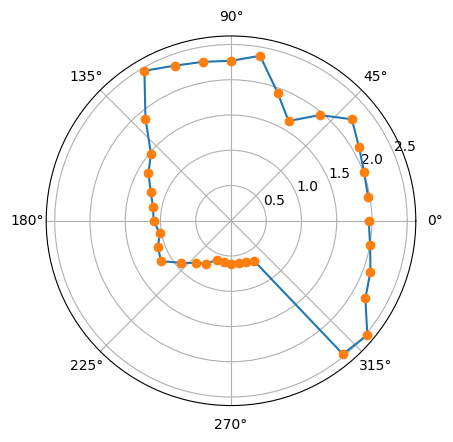

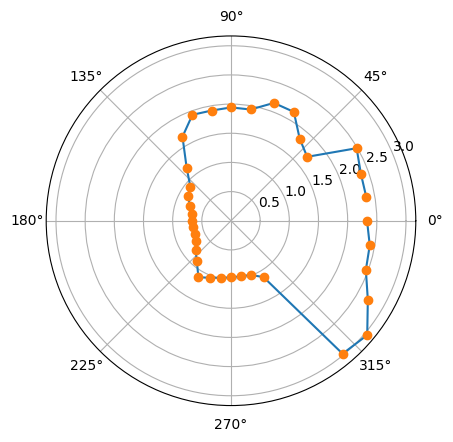

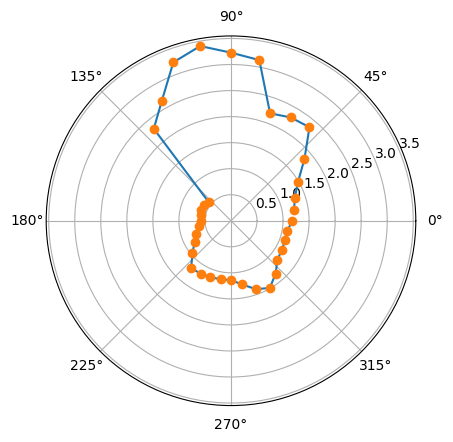

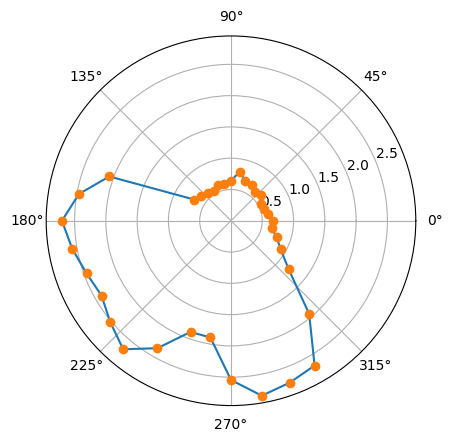

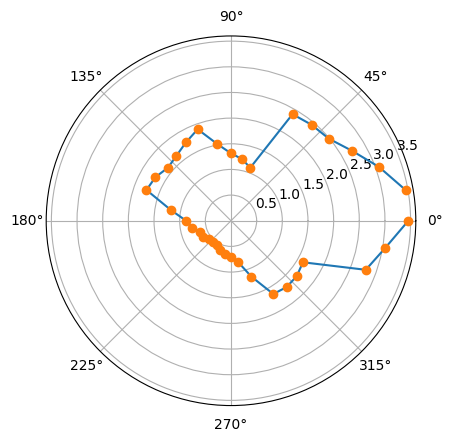

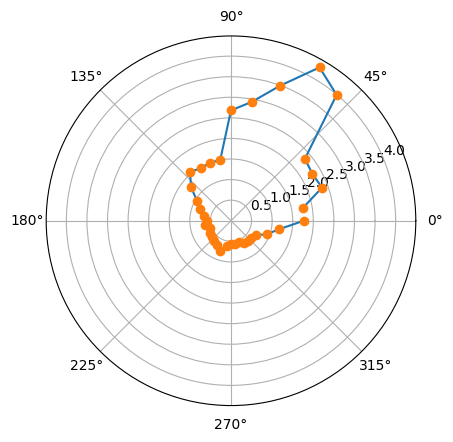

In [20]:
theta = np.linspace(0, 350, 36)
angle = np.deg2rad(theta)

for location in locations_test:
    
    distances = location['sensorData']
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    
    ax.plot(-angle, distances)#, c = colors)
    
    ax.plot(-angle, distances, 'o')


# Random Forest Regression Model

In [21]:
## set mode
use_pretrain = True
is_model_exist = os.path.exists(path='model.pkl')

In [22]:
if use_pretrain and is_model_exist: # load pretrained model
# load
    print('Loading Pretrained Model')
    with open('model.pkl', 'rb') as f:
        clf = pickle.load(f)
else:
    clf = RandomForestRegressor(random_state=0) # initiate random forest algorithm
    clf = make_pipeline(StandardScaler(), clf) # preprocess with Standard Scaler
    print('Training Model')
    clf.fit(X_train, Y_train)

    print('Saving Model')
        # save
    with open('model.pkl','wb') as f:
        pickle.dump(clf,f)

Loading Pretrained Model


## Evaluate Model

In [23]:
# Evaluate Model
score = clf.score(X_eval, Y_eval)
print (f'Accuracy: {score *100}%')

Accuracy: 99.12602124857683%


## Make prediction

In [24]:
# Y_predict = clf.predict(X_eval)
# print(Y_predict, Y_eval)

Y_predict = clf.predict(X_eval)
print("Prediction Results:")

# List of custom messages for each test case
messages = [
    "Test 1: (random-x, y)",
    "Test 2: (x, random-y)",
    "Test 3: (random-x, random-y)",
    "Test 4: Arbitary Angle Location 1",
    "Test 5: Arbitary Angle Location 2",
    "Test 6: Arbitary Angle Location 3",
    "Test 7: Arbitary Angle Location 4"
]

# Loop through predictions, actual values, and messages
for predicted, actual, message in zip(Y_predict, Y_eval, messages):
    print(f"{message}\nPredicted: ({predicted[0]:.2f}, {predicted[1]:.2f}) - Actual: ({actual[0]:.2f}, {actual[1]:.2f})\n")

Prediction Results:
Test 1: (random-x, y)
Predicted: (1.84, 0.55) - Actual: (1.81, 0.54)

Test 2: (x, random-y)
Predicted: (1.94, 1.02) - Actual: (1.93, 1.03)

Test 3: (random-x, random-y)
Predicted: (2.30, 0.67) - Actual: (2.32, 0.63)

Test 4: Arbitary Angle Location 1
Predicted: (1.09, 1.84) - Actual: (1.08, 1.84)

Test 5: Arbitary Angle Location 2
Predicted: (2.66, 2.33) - Actual: (2.66, 2.39)

Test 6: Arbitary Angle Location 3
Predicted: (1.71, 2.21) - Actual: (1.61, 2.39)

Test 7: Arbitary Angle Location 4
Predicted: (3.50, 0.64) - Actual: (3.63, 0.54)



## Visualiz result

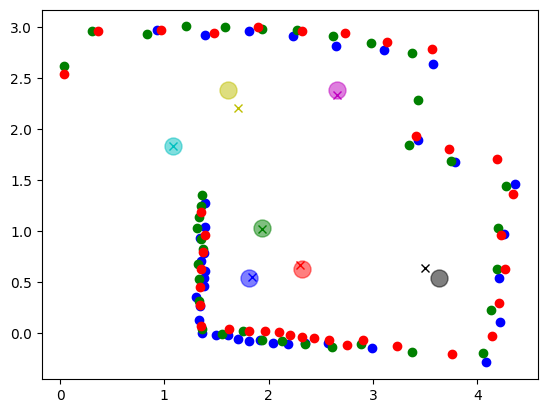

In [25]:
N = 36
angle = np.linspace(0, 350, N)
i = 0
for pred, actual, sens_depth, color in zip(Y_predict, Y_eval, X_eval, mcolors.BASE_COLORS):
    distances = np.array(sens_depth[:N])

    # polar to rectangular
    x_point = actual[0] + (distances * np.sin(np.deg2rad(-angle)))
    y_point = actual[1] + (distances * np.cos(np.deg2rad(-angle)))

    if(i<3):
        plt.scatter(x_point, y_point, c=color)
    plt.plot(pred[0], pred[1], c = color, marker = 'x', label=f'pred-{i}')
    # print(pred[0])
    plt.scatter(actual[0], actual[1], c = color, marker = 'o', s=150, alpha = 0.5, label=f'act-{i}')
    i +=1
    # break
# plt.legend()